# Assignment: SVD Preprocessing on MNIST with Logistic Regression

## Instructions:
In this assignment, you will apply **Singular Value Decomposition (SVD)** as a preprocessing step to the **MNIST dataset** and train a **logistic regression classifier**. You will compare the model performance and training time when using different levels of SVD for dimensionality reduction.

In this assignment, you will need to:
1. Load the MNIST dataset and normalize it.
2. Perform SVD and reduce the dimensions of the data.
3. Train a logistic regression model on the original and SVD-reduced data.
4. Measure and compare the training time and accuracy of the model with varying SVD components.
5. Plot the results and analyze how SVD impacts the performance and efficiency of the model.

***
Your tasks include:
1. Implement SVD algorithm. You are not allowed to directly use SVD implemented by other packages, but you may use functions in NumPy. (Part 2)
2. Explore the accuracy and time performance from different numbers of SVD components. (Part 4)
3. Visualize the accuracy, time performance and top 5 singular vectors in the dataset, analyze and explain which number of SVD component looks best to you? (Part 4,5&6) Hint: singular vectors should be reshaped to 28x28 images for visualization.
***
**Note that you may not import any other function or package.** Let's get started!


## Part 1: Load the MNIST dataset and preprocess the data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
from sklearn.metrics import accuracy_score, classification_report

# Load MNIST dataset
print("Loading MNIST dataset...")
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data
y = mnist.target

# Normalize the data
X = X / 255.0

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Loading MNIST dataset...


## Part 2: Implement SVD for Dimensionality Reduction

In [2]:
def apply_svd_custom(X_train, X_test, n_components):
    X_mean = np.mean(X_train, axis=0)
    X_train_centered = X_train - X_mean
    X_test_centered = X_test - X_mean 
    covariance_matrix = np.dot(X_train_centered.T, X_train_centered) / X_train_centered.shape[0]
    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)
    sorted_indices = np.argsort(eigenvalues)[::-1]
    sorted_eigenvectors = eigenvectors[:, sorted_indices]
    top_eigenvectors = sorted_eigenvectors[:, :n_components]
    X_train_svd = np.dot(X_train_centered, top_eigenvectors)
    X_test_svd = np.dot(X_test_centered, top_eigenvectors)
    
    return X_train_svd, X_test_svd, sorted_eigenvectors

## Part 3: Train Logistic Regression and Measure Performance

In [3]:
# Function to train logistic regression and track training time
def train_logistic_regression(X_train, y_train, X_test, y_test):
    model = LogisticRegression(max_iter=1000, solver='saga', random_state=42) #, multi_class='multinomial')
    
    # Measure training time
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time
    
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    return accuracy, training_time

## Part 4: Experiment with Different Levels of SVD

Now, apply SVD with varying numbers of components and observe how the dimensionality reduction impacts the model's performance. Record both the accuracy and training time for each number of components.


In [4]:
svd_components = [784, 500, 400, 300, 200, 100, 50, 10, 1]  # You need to decide what number to search...

# Store the results
results = []

print("Training models with different levels of SVD preprocessing...")
for n_components in svd_components:
    print(f"Applying custom SVD with {n_components} components...")
    
    # Apply SVD to the training and test sets
    X_train_svd, X_test_svd, sorted_eigenvectors = apply_svd_custom(X_train, X_test, n_components)
    
    # Train the logistic regression model and get accuracy and training time
    accuracy, training_time = train_logistic_regression(X_train_svd, y_train, X_test_svd, y_test)

    results.append((n_components, accuracy, training_time))
        
    print(f"SVD components: {n_components}, Accuracy: {accuracy:.4f}, Training time: {training_time:.4f} seconds")

Training models with different levels of SVD preprocessing...
Applying custom SVD with 784 components...
SVD components: 784, Accuracy: 0.9207, Training time: 527.2256 seconds
Applying custom SVD with 500 components...
SVD components: 500, Accuracy: 0.9205, Training time: 327.6194 seconds
Applying custom SVD with 400 components...
SVD components: 400, Accuracy: 0.9196, Training time: 269.8802 seconds
Applying custom SVD with 300 components...
SVD components: 300, Accuracy: 0.9206, Training time: 157.2419 seconds
Applying custom SVD with 200 components...
SVD components: 200, Accuracy: 0.9206, Training time: 92.4205 seconds
Applying custom SVD with 100 components...
SVD components: 100, Accuracy: 0.9181, Training time: 40.4487 seconds
Applying custom SVD with 50 components...
SVD components: 50, Accuracy: 0.9080, Training time: 14.2538 seconds
Applying custom SVD with 10 components...
SVD components: 10, Accuracy: 0.8035, Training time: 1.3604 seconds
Applying custom SVD with 1 componen

## Part 5: Visualize and Analyze the Results

Finally, plot the accuracy, training time as a function of the number of SVD components, and top 5 singular vectors. This will help you understand the trade-off between dimensionality reduction, accuracy, and model training time, and how SVD generally works. Hint: singular vectors should be reshaped to 28x28 images for visualization.


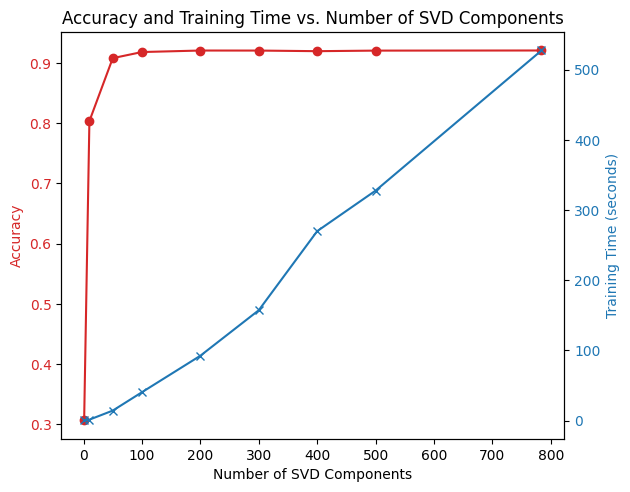

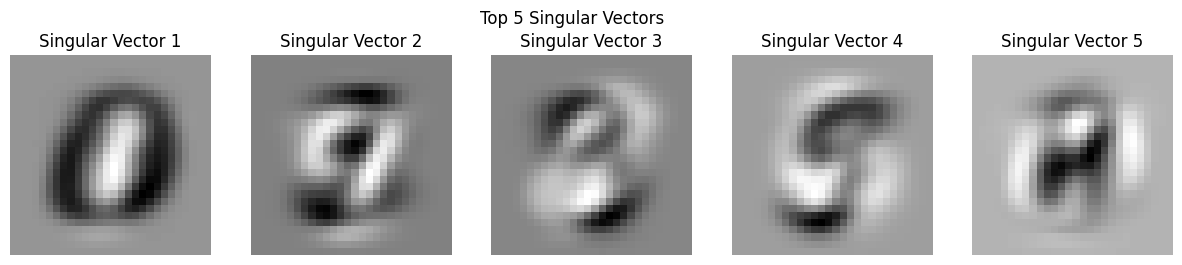

In [5]:
## Your implementation here...
## You may add necessary lines in Part 4 to access data for visualization
# Import necessary libraries

# Define function to plot results
def plot_results(results, sorted_eigenvectors):
    n_components = [r[0] for r in results]
    accuracies = [r[1] for r in results]
    training_times = [r[2] for r in results]

    # Plot accuracy and training time
    fig, ax1 = plt.subplots()

    color = 'tab:red'
    ax1.set_xlabel('Number of SVD Components')
    ax1.set_ylabel('Accuracy', color=color)
    ax1.plot(n_components, accuracies, color=color, marker='o', label='Accuracy')
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
    color = 'tab:blue'
    ax2.set_ylabel('Training Time (seconds)', color=color)  # we already handled the x-label with ax1
    ax2.plot(n_components, training_times, color=color, marker='x', label='Training Time')
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.title('Accuracy and Training Time vs. Number of SVD Components')
    plt.show()

    # Plot the top 5 singular vectors as 28x28 images
    fig, axes = plt.subplots(1, 5, figsize=(15, 3))
    for i, ax in enumerate(axes):
        ax.imshow(sorted_eigenvectors[:, i].reshape(28, 28), cmap='gray')
        ax.set_title(f'Singular Vector {i+1}')
        ax.axis('off')
    plt.suptitle('Top 5 Singular Vectors')
    plt.show()

# Plot accuracy, training time, and top singular vectors
plot_results(results, sorted_eigenvectors)


## Part 6: Analyze / Conclusion 

YOUR ANSWER: 

With no dimensionality reduction, the model achieved its highest accuracy and as the number of components decreased the accuracy lowered.
The training time for 784 components was the longest and as the number of components decreased, the training time also decreased.
Despite the reduced training times, the model still achieved reasonable accuracy with 100 or 50 components.
At a 100 componentsn we have significant shorter training time in training while maintaining accuracy close to that of the full model.